## 1. Problem statement

### 1.1 Context
This dataset contains information about used motorcycles listed on www.bikedekho.com.

### 1.2 Content
So the dataset will be used to build a predictive model to predict the price of a used motorcycle based on its input features.

The features(columns) in the given dataset are as follows:

- name
- selling_price
- year
- seller_type
- owner
- km_driven
- ex_showroom_price


## 2. Machine Learning problem
### 2.1 Data Overview
For this project:

The dataset has 1061 records about the used motorcycles sold.
Each record is for the transaction done to purchase the used motorcycle.

__Target Variable__

'selling_Price' - Price at which seller is selling the motorcycle

__Features of the data:__

- 'name' - Name of the motorcycles
- 'year' - year in which bike was bought
- 'seller_type' - Tells if a Seller is Individual or a Dealer
- 'owner' -  Number of previous owners of the vehicle.
- 'km_driven' - Number of kilometre motorcycle has traveled
- 'ex_showroom_price' - Showroom price of the motorcycle




### 2.2 Mapping ML problem

This is a regression problem, where given the above set of features, we need to predict the selling price of the used bike. Following machine learning algorithms were used:

* 1) LinearRegression
* 2) Ridge Regression
* 3) Lasso Regression
* 4) RandomForestRegressor
* 5) XGBoostRegressor
* 6) DecisionTreeRegressor
* 7) KNeighborsRegressor
* 8) Support Vector Regressor
* 9) ExtraTreeRegressor

__Finally we will create a stable and best performing model using voting method__

## 2.3 Performance Metric (KPI)

Since it is a regression problem, we will use the following regression metrics:

 - Root Mean Squared Error (RMSE)
 - Mean Absolute Error (MAE)

In [1]:
# Importing the libraries 
import numpy as np
import pandas as pd

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten

C:\Users\SHUBHAM CHAUHAN\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\SHUBHAM CHAUHAN\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\SHUBHAM CHAUHAN\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\SHUBHAM CHAUHAN\Anaconda3\lib\site-packages\tensorflow\python\frame

In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [5]:
# Will use Imagenet weight- wegihts will be downlaoded and stored for use in our model.ie. Transfer Learning
# Add preprocessing layer to front of resnet-50
resnet = ResNet50(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

C:\Users\SHUBHAM CHAUHAN\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


A local file was found, but it seems to be incomplete or outdated because the md5 file hash does not match the original value of a268eb855778b3df3c7506639542a6af so we will re-download the data.
94658560/94653016 [==============================] - 16s 0us/step


In [6]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [7]:
## Till here we have chopped-off the transfer model for our use
# now we will add more weights as per our requirement

In [8]:
# Wont train the existing weights
for layer in resnet.layers:
    layer.trainable = False

In [9]:
# Glob function will tell us about number of classes of datset given in folders
folder = glob('Datasets/train/*')
folder

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [10]:
# Flattening will convert the 2-D matrix feature into a vector that is fed to fully connected NN classifier
x = Flatten()(resnet.output)

In [11]:
prediction = Dense(len(folder),activation = 'softmax')(x)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
# Create a model object
model = Model(inputs = resnet.input, outputs = prediction)

In [13]:
# Viewing the structure of model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
______________________________________________________________________________________________

In [14]:
# Last layer has 3 nodes which we require to classify three outputs of our classification

In [15]:
# tell the model what cost and optimization method to use
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [16]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, #converts all images pixel to 0 to 1
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

In [17]:
test_datagen = ImageDataGenerator(rescale = 1./255)

#### Till here we have created our neural network model 

In [18]:
# Make sure to provide the same target size as initialied for the image size
# Now we will read all the images
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode= 'categorical')

Found 64 images belonging to 3 classes.


In [19]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode= 'categorical')

Found 58 images belonging to 3 classes.


In [20]:
# fit the model
r = model.fit_generator(training_set,
                        validation_data=test_set,
                        epochs = 30,
                        steps_per_epoch = len(training_set),
                        validation_steps= len(test_set))

Epoch 1/30
2/2 [==============================] - 68s 34s/step - loss: 4.4811 - acc: 0.3594 - val_loss: 7.9276 - val_acc: 0.3276
Epoch 2/30
2/2 [==============================] - 60s 30s/step - loss: 4.9853 - acc: 0.6719 - val_loss: 10.0024 - val_acc: 0.3276
Epoch 3/30
2/2 [==============================] - 59s 30s/step - loss: 1.9316 - acc: 0.8125 - val_loss: 9.4447 - val_acc: 0.3276
Epoch 4/30
2/2 [==============================] - 61s 31s/step - loss: 0.2388 - acc: 0.9375 - val_loss: 8.2588 - val_acc: 0.3276
Epoch 5/30
2/2 [==============================] - 61s 31s/step - loss: 0.5362 - acc: 0.9219 - val_loss: 7.5293 - val_acc: 0.3276
Epoch 6/30
2/2 [==============================] - 59s 29s/step - loss: 0.1456 - acc: 0.9688 - val_loss: 7.8072 - val_acc: 0.3276
Epoch 7/30
2/2 [==============================] - 59s 29s/step - loss: 0.2520 - acc: 0.9688 - val_loss: 9.1399 - val_acc: 0.3276
Epoch 8/30
2/2 [==============================] - 59s 30s/step - loss: 0.1571 - acc: 0.9688 - va

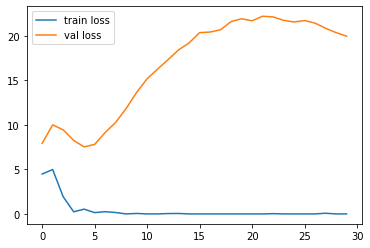

In [23]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

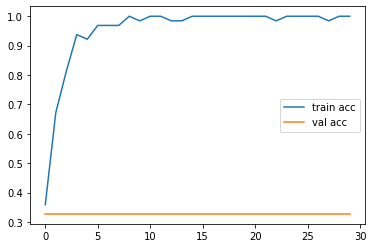

In [25]:
# plot the accuracy
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()

### Note: the test accuracy is close to 32 % which is very poor.Probably this happened because the number of images are less in train data set. If we increase the number of images then we can achieve good test accuracy

In [26]:
#  Saving the model as a h5 file
from tensorflow.keras.models import load_model
model.save('Car_prediction_model_resnet50.h5')

In [28]:
# Prediction for the test data
y_pred = model.predict(test_set)

In [29]:
y_pred # the array we obtain gives the probablity for each class 

array([[1.44113766e-11, 8.16771509e-15, 1.00000000e+00],
       [2.83407534e-11, 6.31382425e-14, 1.00000000e+00],
       [7.46481488e-11, 2.77393278e-14, 1.00000000e+00],
       [9.10632542e-11, 1.76504607e-14, 1.00000000e+00],
       [4.61641905e-11, 1.73300129e-14, 1.00000000e+00],
       [5.26640745e-11, 1.30754435e-14, 1.00000000e+00],
       [1.01130986e-10, 3.62438283e-14, 1.00000000e+00],
       [6.78038597e-11, 2.50478264e-14, 1.00000000e+00],
       [1.61798613e-11, 4.26188185e-15, 1.00000000e+00],
       [1.03698800e-10, 6.39889219e-15, 1.00000000e+00],
       [5.91065391e-11, 1.23725467e-14, 1.00000000e+00],
       [4.09226958e-11, 1.05291227e-14, 1.00000000e+00],
       [3.00352160e-10, 3.65204964e-14, 1.00000000e+00],
       [4.64692382e-11, 2.41339253e-14, 1.00000000e+00],
       [1.44991085e-11, 1.49152897e-14, 1.00000000e+00],
       [6.81502979e-11, 1.39417464e-14, 1.00000000e+00],
       [1.78701984e-11, 9.60188163e-15, 1.00000000e+00],
       [4.54493491e-11, 1.13563

In [30]:
y_pred_image = np.argmax(y_pred,axis = 1)

In [31]:
y_pred_image

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

#### - So our model is predicting that all images belong to 3rd category i.e. Mercedes
#### - Model is not perfect and  encountering the problem of overfitting, still we will continue

### Now we will try to predict again a single image from test data

In [36]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [38]:
model_new = load_model('Car_prediction_model_resnet50.h5')

In [43]:
img=image.load_img('Datasets/Test/lamborghini/10.jpg',target_size=(224,224))

In [45]:
x = image.img_to_array(img) #Convert image to an array
x

array([[[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        ...,
        [ 13.,   2.,   0.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 18.,   8.,   0.],
        [ 18.,   8.,   0.],
        [ 19.,   9.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       ...,

       [[209., 129.,  92.],
        [210., 130.,  93.],
        [212., 132.,  95.],
        ...,
        [216., 132.,  96.],
        [214., 129.,  92.],
        [213., 129.,  92.]],

       [[208., 128.,  91.],
        [208., 128.,  91.],
        [211., 131.,  94.],
        ...,
        [215., 131.,  95.],
        [209., 129.,  94.],
        [207., 129.,  93.]],

       [[206., 128.,  90.],
        [206., 128.,  90.],
        [209., 1

In [46]:
x.shape

(224, 224, 3)

In [47]:
x = x/225

In [48]:
# We have to change the shape of image for our model to read and predict
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [49]:
# Prediction
model.predict(img_data)

array([[5.6458561e-05, 5.3109368e-11, 9.9994349e-01]], dtype=float32)

In [50]:
car_is = np.argmax(model.predict(img_data), axis=1)

In [52]:
if car_is == 0:
    print('Car is Audi')
elif car_is == 1:
    print('Car is Lamborghini')
else:
    print('car is Mercedes')

car is Mercedes


### Concluion: The Predictive model we built can predict the car brands from the image. 
### Note : trying to fix the issue of overfitting by adding more number of images